In [116]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# import plotly.express as p
from plotly.subplots import make_subplots
# from geopy.geocoders import Nominatim
palette1 = sns.color_palette("rainbow", 8)

In [117]:
# now creating Dataframe for the dataset: layoffs_data
# read in the "layoffs_data.csv" file using pandas and store it in a DataFrame named "df"

In [118]:
df= pd.read_csv("D:\Anand\Python\PROJECT 2\layoffs_data.csv")

In [119]:
df.head()  #checking what type of data I have.

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Nuro,SF Bay Area,Transportation,340.0,0.30,2023-05-12,https://techcrunch.com/2023/05/12/autonomous-d...,2100.0,Series D,2023-05-11 00:12:57,United States,Unknown
1,Telenav,Cluj-Napoca,Transportation,172.0,NaN,2023-05-12,https://www.romania-insider.com/telenav-closes...,30.0,Post-IPO,2023-05-12 14:48:51,Romania,Unknown
2,Cornershop,Santiago,Food,250.0,0.11,2023-05-11,https://www.bloomberg.com/news/articles/2023-0...,31.0,Acquired,2023-05-12 14:46:24,Chile,https://docs.google.com/spreadsheets/d/1nKzSR-...
3,CS Disco,Austin,Legal,NaN,0.08,2023-05-11,https://www.law360.com/pulse/legal-tech/articl...,233.0,Post-IPO,2023-05-12 14:50:17,United States,Unknown
4,Microsoft,Seattle,Other,158.0,NaN,2023-05-10,https://www.geekwire.com/2023/microsoft-cuttin...,1.0,Post-IPO,2023-05-11 00:12:03,United States,Unknown


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2596 non-null   object 
 1   Location_HQ                 2596 non-null   object 
 2   Industry                    2596 non-null   object 
 3   Laid_Off_Count              1785 non-null   float64
 4   Percentage                  1733 non-null   float64
 5   Date                        2594 non-null   object 
 6   Source                      2596 non-null   object 
 7   Funds_Raised                2344 non-null   float64
 8   Stage                       2596 non-null   object 
 9   Date_Added                  2596 non-null   object 
 10  Country                     2596 non-null   object 
 11  List_of_Employees_Laid_Off  2595 non-null   object 
dtypes: float64(3), object(9)
memory usage: 243.5+ KB


In [121]:
# my requirement is to work with only selected columns of my dataframe 
# so creating new dataframe which will include only columns i need to work with

In [122]:
layoffs_df= df[['Company', 'Location_HQ','Industry','Laid_Off_Count','Percentage','Date','Country']].copy()

In [123]:
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Country
0,Nuro,SF Bay Area,Transportation,340.0,0.30,2023-05-12,United States
1,Telenav,Cluj-Napoca,Transportation,172.0,NaN,2023-05-12,Romania
2,Cornershop,Santiago,Food,250.0,0.11,2023-05-11,Chile
3,CS Disco,Austin,Legal,NaN,0.08,2023-05-11,United States
4,Microsoft,Seattle,Other,158.0,NaN,2023-05-10,United States


In [124]:
type('Date')

str

In [125]:
#converting date from string to Date type using "to_datetime()" method from pandas
layoffs_df['Date']= pd.to_datetime(layoffs_df['Date'])

In [126]:
print(layoffs_df.dtypes)

Company                   object
Location_HQ               object
Industry                  object
Laid_Off_Count           float64
Percentage               float64
Date              datetime64[ns]
Country                   object
dtype: object


In [127]:
# create a new column in the "layoffs_df" DataFrame called 'year' by extracting the year from the 'Date' column using the 
# "dt.strftime()" method from pandas
# the "%Y" format code is used to extract the year in 4-digit format
layoffs_df['YEAR'] = layoffs_df['Date'].dt.strftime('%Y')

In [128]:
layoffs_df['YEAR']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
2591    2020
2592    2020
2593    2020
2594     NaN
2595     NaN
Name: YEAR, Length: 2596, dtype: object

In [129]:
# pyplot is a plotting library used for 2D graphics in python programming language.

In [130]:
layoffs_df.isnull()
layoffs_df.head(50)
layoffs_df['Laid_Off_Count'] = layoffs_df['Laid_Off_Count'].fillna(0).astype(float)

In [131]:
print(layoffs_df.dtypes)

Company                   object
Location_HQ               object
Industry                  object
Laid_Off_Count           float64
Percentage               float64
Date              datetime64[ns]
Country                   object
YEAR                      object
dtype: object


In [132]:
layoffs_df['YEAR']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
2591    2020
2592    2020
2593    2020
2594     NaN
2595     NaN
Name: YEAR, Length: 2596, dtype: object

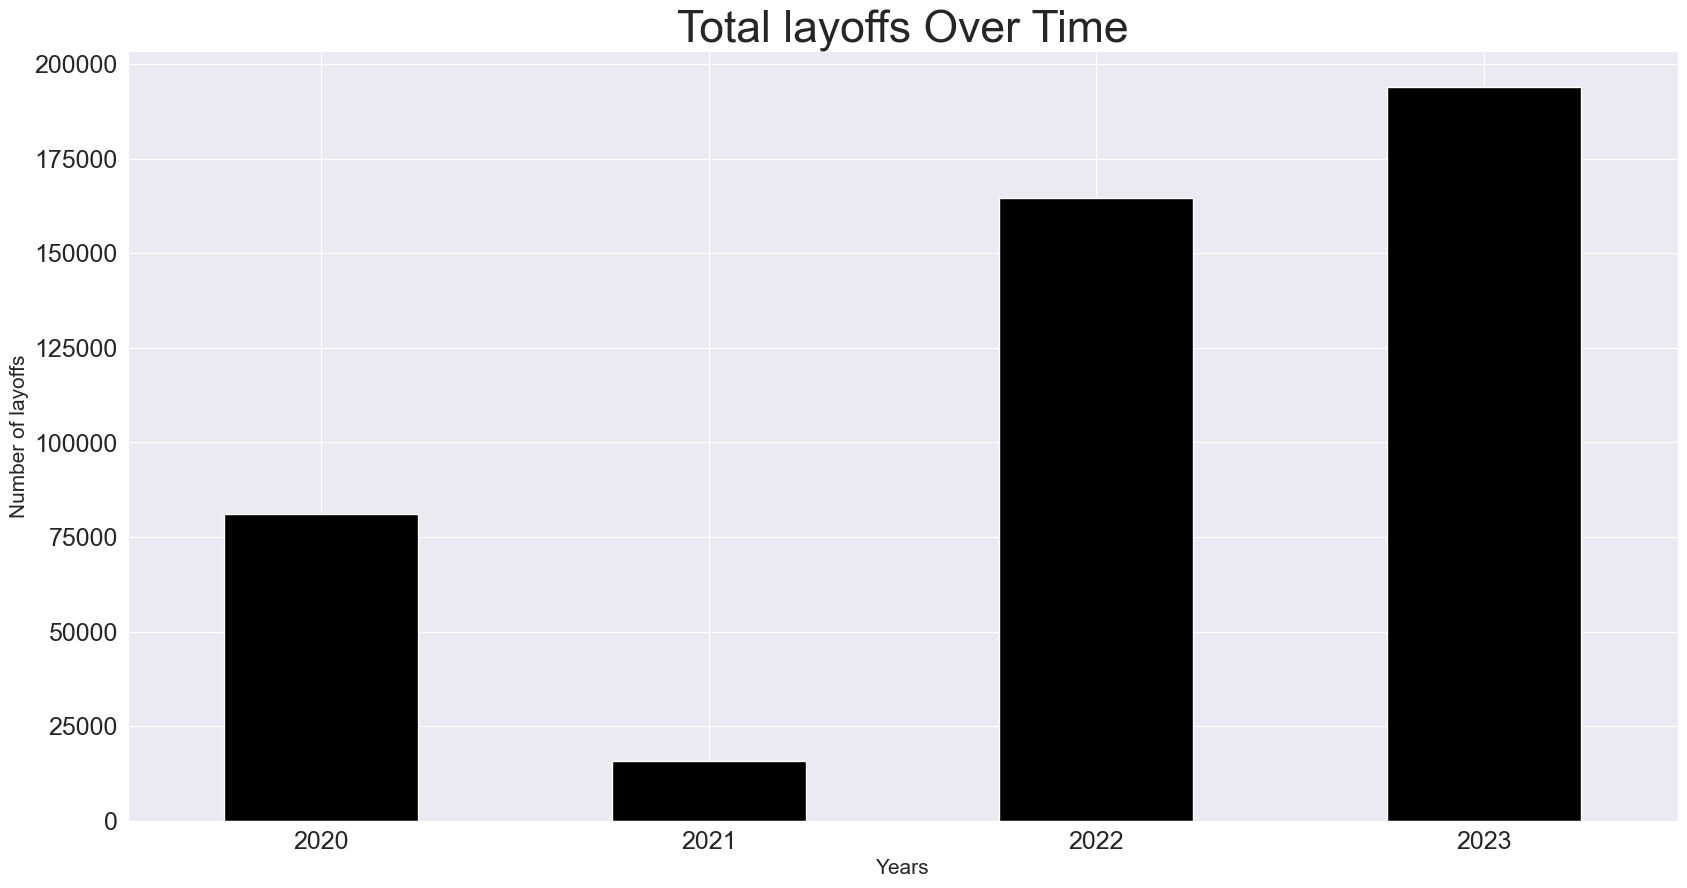

In [133]:
# Grouping the data by year and summing the 'Laid_Off_Count'
grouped_df = layoffs_df.groupby('YEAR')['Laid_Off_Count'].sum()

# Creating the bar plot
grouped_df.plot.bar(figsize=(20, 10),color='black')

# Adding labels and title
plt.xlabel(xlabel="Years", fontsize=15)
plt.ylabel(ylabel='Number of layoffs', fontsize=15)
plt.title("Total layoffs Over Time", fontsize=32)
# Increasing the size of x-axis tick labels
plt.xticks(fontsize=18,rotation=0)

# Increasing the size of y-axis tick labels
plt.yticks(fontsize=18)
# Displaying the plot
plt.show()

In [97]:
# now I want to show layoffs in various industries

In [98]:
grouped2_df=layoffs_df.groupby('Industry')['Laid_Off_Count'].sum()

Text(0.5, 1.0, 'Layoffs across various industries')

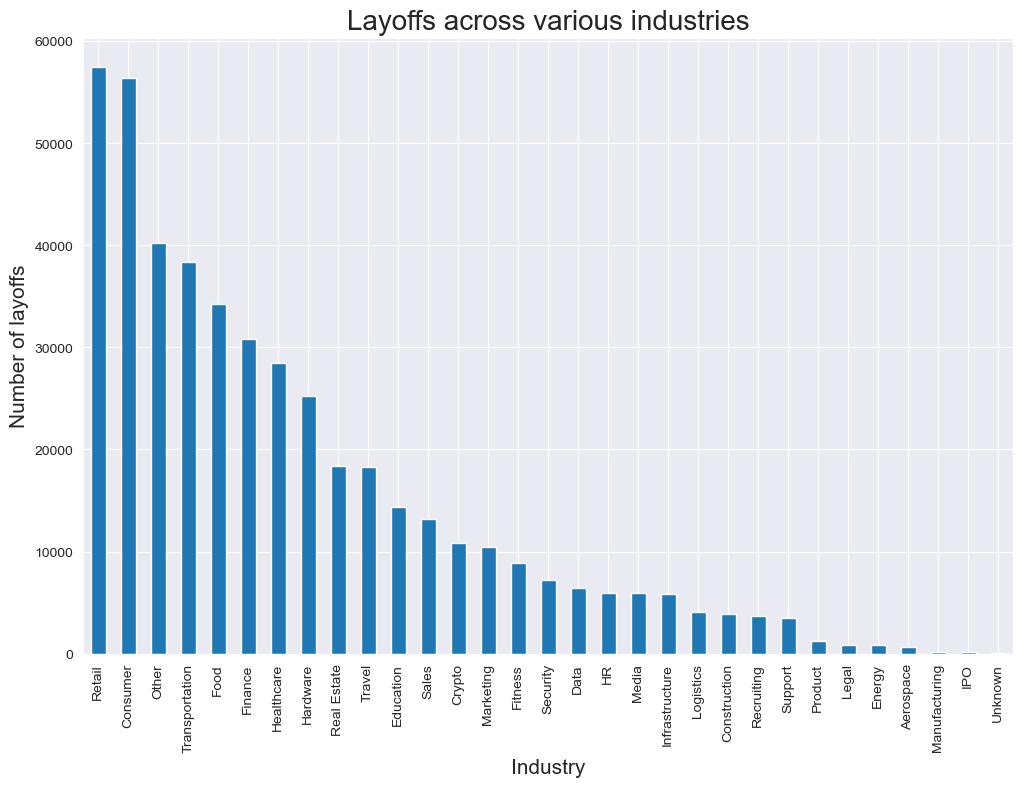

In [99]:
# Sorting the data in ascending order
sorted2_df = grouped2_df.sort_values(ascending=False)

# Creating the bar plot
sorted2_df.plot.bar(figsize=(12, 8))

# Set the label for the x-axis using the "xlabel()" method from matplotlib.pyplot
plt.xlabel(xlabel='Industry', fontsize=15)

# Set the label for the y-axis using the "ylabel()" method from matplotlib.pyplot
plt.ylabel(ylabel='Number of layoffs', fontsize=15)

# Set the title of the plot using the "title()" method from matplotlib.pyplot
plt.title('Layoffs across various industries', fontsize=20)

In [100]:
# Now showing Layoffs On yearly basis:

In [101]:
laidOff_countYear = layoffs_df.groupby('YEAR', as_index=False).sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14108\2407405505.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countYear = layoffs_df.groupby('YEAR', as_index=False).sum()


([<matplotlib.patches.Wedge at 0x20eb6b593c0>,
 [Text(0.9326084515027497, 0.5833022168530165, '2020'),
  Text(0.3707334154526282, 1.0356431502534207, '2021'),
  Text(-0.9251915189795901, 0.7324074366145111, '2022'),
  Text(0.25406258815737476, -1.0702580068837497, '2023')],
 [Text(0.5086955190014998, 0.3181648455561908, '18%'),
  Text(0.20221822661052447, 0.564896263774593, '3%'),
  Text(-0.5331612143272213, 0.42206530245581986, '36%'),
  Text(0.1385795935403862, -0.5837770946638634, '43%')])

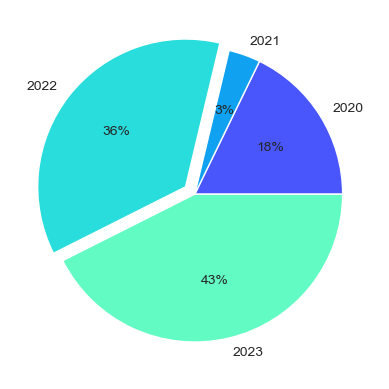

In [102]:
plt.pie(data=laidOff_countYear, x= laidOff_countYear['Laid_Off_Count'],labels=laidOff_countYear['YEAR'], autopct='%.f%%',
       explode = [0, 0, 0.08, 0], colors=palette1)

In [103]:
layoffs_df = layoffs_df[layoffs_df['Laid_Off_Count'].notna()] #removing null value

In [104]:
layoffs_df=df.fillna(0) # Converting NAN values to zeros

In [105]:
layoffs_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Nuro,SF Bay Area,Transportation,340.0,0.30,2023-05-12,https://techcrunch.com/2023/05/12/autonomous-d...,2100.0,Series D,2023-05-11 00:12:57,United States,Unknown
1,Telenav,Cluj-Napoca,Transportation,172.0,0.00,2023-05-12,https://www.romania-insider.com/telenav-closes...,30.0,Post-IPO,2023-05-12 14:48:51,Romania,Unknown
2,Cornershop,Santiago,Food,250.0,0.11,2023-05-11,https://www.bloomberg.com/news/articles/2023-0...,31.0,Acquired,2023-05-12 14:46:24,Chile,https://docs.google.com/spreadsheets/d/1nKzSR-...
3,CS Disco,Austin,Legal,0.0,0.08,2023-05-11,https://www.law360.com/pulse/legal-tech/articl...,233.0,Post-IPO,2023-05-12 14:50:17,United States,Unknown
4,Microsoft,Seattle,Other,158.0,0.00,2023-05-10,https://www.geekwire.com/2023/microsoft-cuttin...,1.0,Post-IPO,2023-05-11 00:12:03,United States,Unknown


In [106]:
# Plotting layoffs count according to regions.

In [108]:
# This line of code groups the rows of the 'layoffs_df' DataFrame by the 'Country' column and calculates the sum of the values in each group.
# The 'as_index=False' argument ensures that the 'Country' column is included in the resulting DataFrame as a regular column instead of being used as the index.
laidOff_countByCountry = layoffs_df.groupby('Country', as_index=False).sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14108\1474051310.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  laidOff_countByCountry = layoffs_df.groupby('Country', as_index=False).sum()


In [109]:
# Define a list of countries in Asia.
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']

# Define a list of countries in North America.
n_america = ['Canada', 'Mexico', 'United States']

# Define a list of countries in South America.
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

In [110]:
# Filter the 'laidOff_countByCountry' DataFrame to only include countries in Asia.
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in North America.
nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]

# Filter the 'laidOff_countByCountry' DataFrame to only include countries in South America.
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000')])

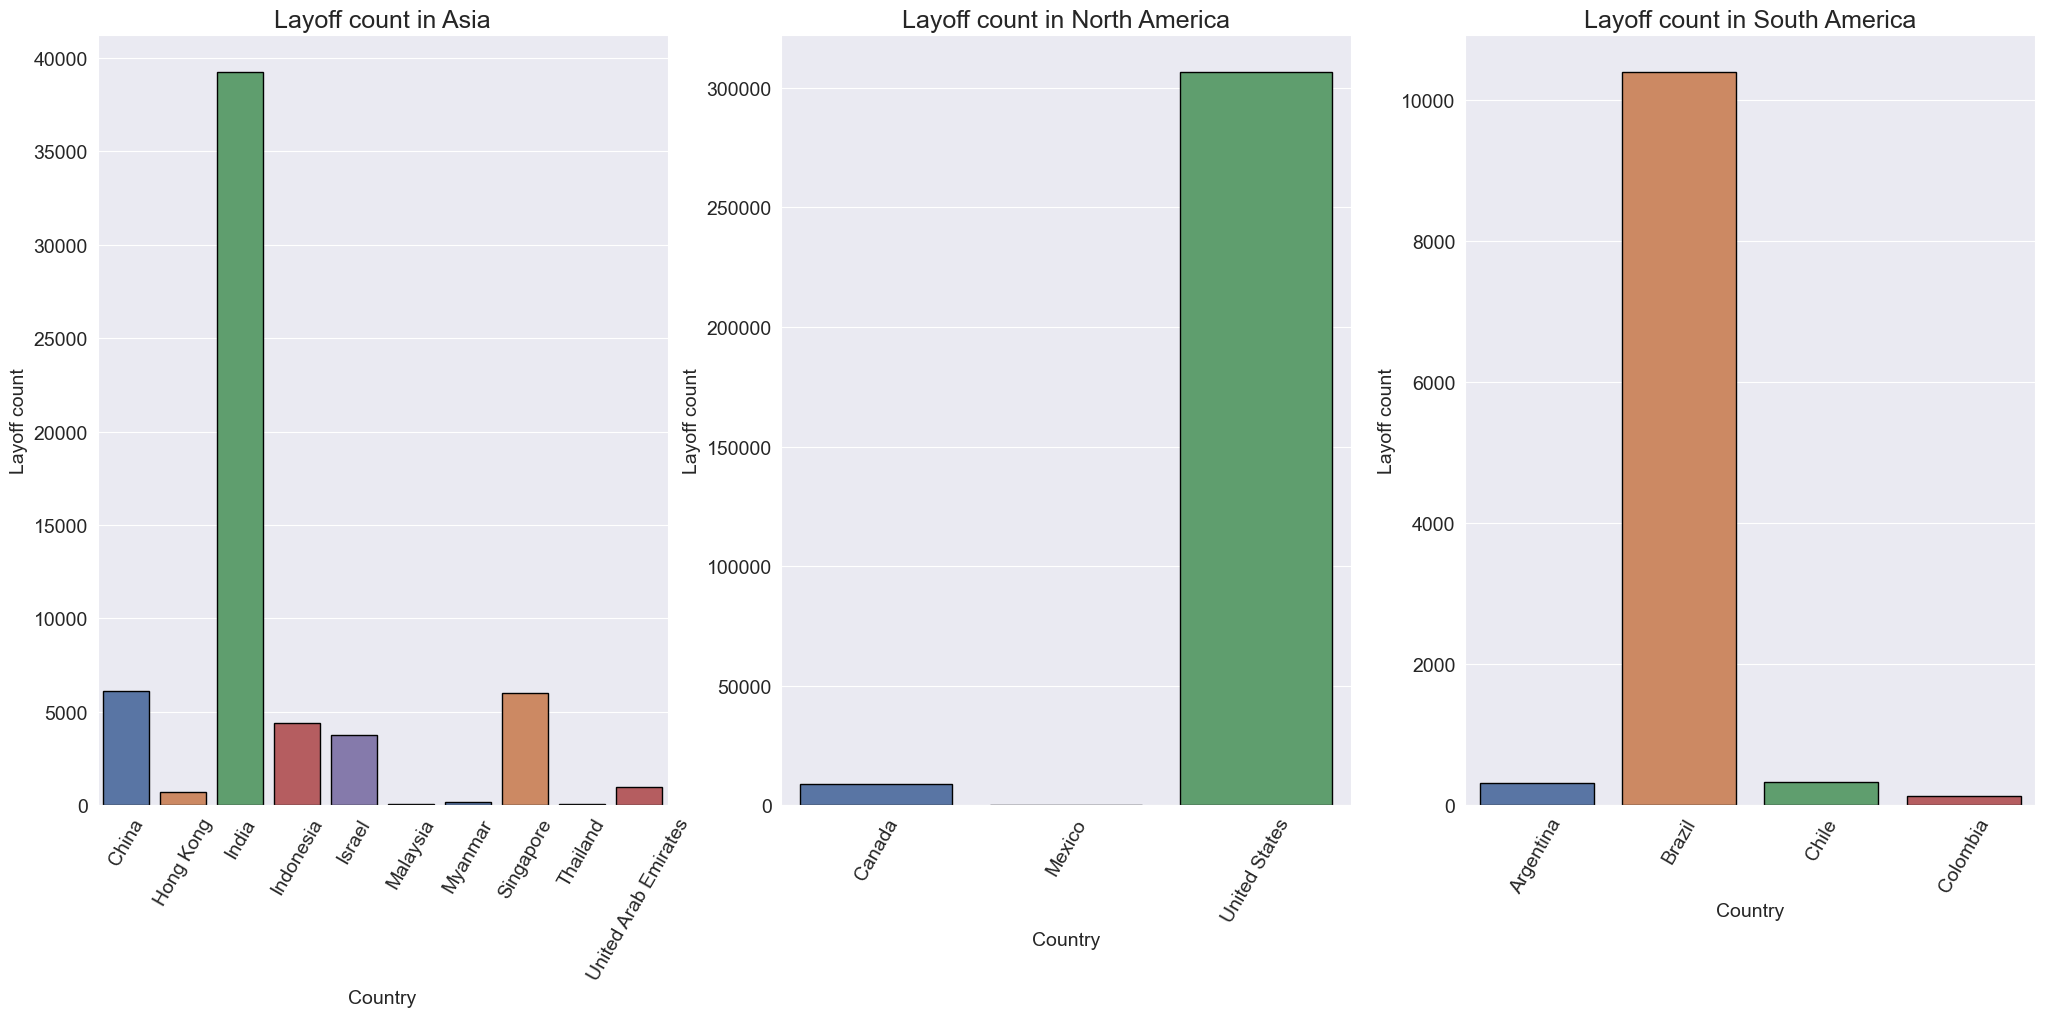

In [111]:
# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
palette = sns.color_palette('deep', n_colors=6)


# 1st row , total no of columns=3 , position=1
plt.subplot(1, 3, 1)
sns.barplot(data=asia_insight, y=asia_insight['Laid_Off_Count'], x=asia_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country',fontsize=14)
plt.ylabel('Layoff count',fontsize=14)
plt.title("Layoff count in Asia", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 1st row , total no of columns=3 , position=2
plt.subplot(1, 3, 2)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Laid_Off_Count'], x=nAmerica_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country',fontsize=14)
plt.ylabel('Layoff count',fontsize=14)
plt.title("Layoff count in North America", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# 1st row , total no of columns=3 , position=3 
plt.subplot(1, 3, 3)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Laid_Off_Count'], x=sAmerica_insight['Country'], palette=palette,linewidth=1,edgecolor='black')
plt.xticks(rotation = 60)
plt.xlabel('Country',fontsize=14)
plt.ylabel('Layoff count',fontsize=14)
plt.title("Layoff count in South America", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [112]:
# Sort the DataFrame by 'Laid_Off_Count' in descending order
top10_comp = layoffs_df.sort_values('Laid_Off_Count', ascending=False)

# Select the top 10 companies with the highest number of layoffs
top10_comp = top10_comp.head(10)

# Display the resulting DataFrame
top10_comp

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
509,Google,SF Bay Area,Consumer,12000.0,0.06,2023-01-20,https://www.nytimes.com/2023/01/20/business/go...,26.0,Post-IPO,2023-01-20 14:23:42,United States,Unknown
982,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,26000.0,Post-IPO,2022-11-09 15:04:03,United States,https://docs.google.com/spreadsheets/d/1edAZoF...
189,Meta,SF Bay Area,Consumer,10000.0,0.00,2023-03-14,https://about.fb.com/news/2023/03/mark-zuckerb...,26000.0,Post-IPO,2023-03-14 15:19:25,United States,Unknown
914,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,https://www.nytimes.com/2022/11/14/technology/...,108.0,Post-IPO,2022-11-16 17:40:58,United States,https://docs.google.com/spreadsheets/d/1f0QvaM...
542,Microsoft,Seattle,Other,10000.0,0.05,2023-01-18,https://www.usatoday.com/story/money/2023/01/1...,1.0,Post-IPO,2023-01-18 02:05:15,United States,Unknown
173,Amazon,Seattle,Retail,9000.0,0.00,2023-03-20,https://www.cnbc.com/2023/03/20/amazon-layoffs...,108.0,Post-IPO,2023-03-20 15:07:51,United States,Unknown
258,Ericsson,Stockholm,Other,8500.0,0.08,2023-02-24,https://www.reuters.com/business/media-telecom...,663.0,Post-IPO,2023-02-24 05:00:10,Sweden,Unknown
682,Amazon,Seattle,Retail,8000.0,0.02,2023-01-04,https://www.wsj.com/articles/amazon-to-lay-off...,108.0,Post-IPO,2023-01-05 04:17:11,United States,Unknown
62,Flink,Berlin,Food,8000.0,0.40,2023-04-24,https://www.manager-magazin.de/unternehmen/tec...,1000.0,Series B,2023-04-25 13:58:38,Germany,Unknown
683,Salesforce,SF Bay Area,Sales,8000.0,0.10,2023-01-04,https://www.nytimes.com/2023/01/04/business/sa...,65.0,Post-IPO,2023-01-04 15:39:44,United States,https://docs.google.com/spreadsheets/d/1FViDWn...


In [113]:
print(f"Total employees laidoff {df['Laid_Off_Count'].sum()}")
print(f"max layoff count {df['Laid_Off_Count'].max()}")
print(f"min layoff count {df['Laid_Off_Count'].min()}")

Total employees laidoff 455819.0
max layoff count 12000.0
min layoff count 3.0
